In [1]:
import pandas as pd
import os

path = './2st/'
modules = pd.DataFrame()
for f in os.listdir(path):
    module = pd.read_excel(path+f, index_col = 0)
    modules = pd.concat([modules,module])

In [2]:
rack = pd.read_excel("(220406)KETI 시험의뢰#1_2차시험_랙 데이터.xlsx", index_col = 0)

In [4]:
rack.columns

Index(['MIN_CELL_TEMP', 'MIN_CELL_TEMP_Pt', 'MAX_CELL_TEMP',
       'MAX_CELL_TEMP_Pt', 'MIN_CELL_VOLT', 'MIN_CELL_VOLT_Pt',
       'MAX_CELL_VOLT', 'MAX_CELL_VOLT_Pt', 'RACK_VOLTAGE', 'RACK_CURRENT',
       'RACK_SOC'],
      dtype='object')

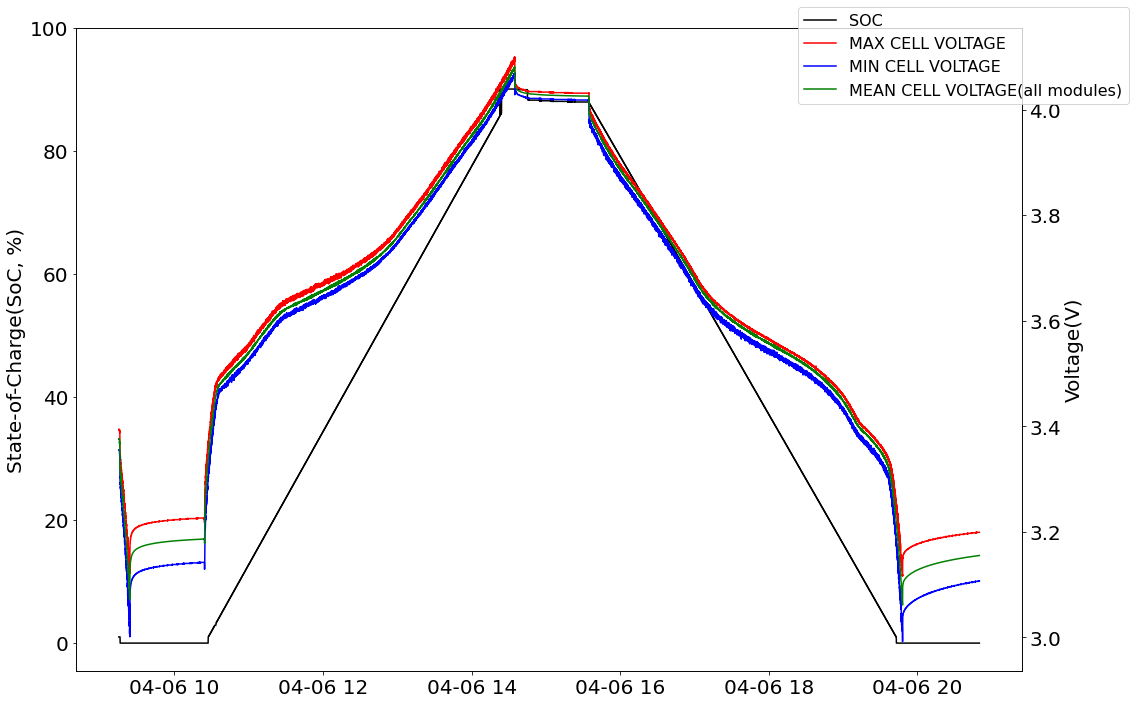

In [47]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

def plot_mean_voltage_modules(modules):
    module_mean_voltage = pd.DataFrame()
    cell_voltages = [ f'Cell_Voltage{i}' for i in range(1,13)]
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        module_mean = temp[cell_voltages].mean(axis=1)
        module_mean_voltage = pd.concat([module_mean_voltage,module_mean], axis=1)
    ax2.plot(rack.index, module_mean_voltage.mean(axis=1)[:-1], color='green', label="MEAN CELL VOLTAGE(all modules)")

## RACK의 전압 시각화

plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=20) 

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()

ax2.plot(rack.index, rack["MAX_CELL_VOLT"], color='red' , label="MAX CELL VOLTAGE")
ax2.plot(rack.index, rack["MIN_CELL_VOLT"], color='blue', label="MIN CELL VOLTAGE")
ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")


ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Voltage(V)")
ax2.set_yticks([3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2])

plot_mean_voltage_modules(modules)

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
plt.savefig("./2st_fig/rack/rack Voltages Non-position.jpg", dpi=256)

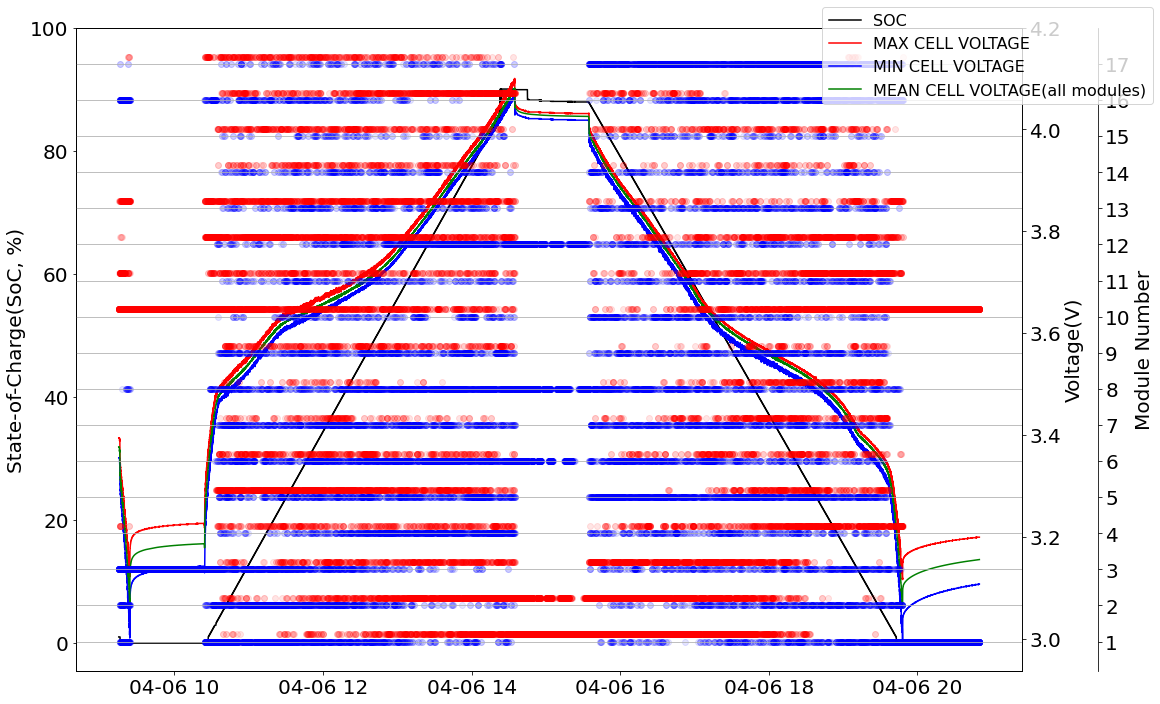

In [56]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

def plot_mean_voltage_modules(modules):
    module_mean_voltage = pd.DataFrame()
    cell_voltages = [ f'Cell_Voltage{i}' for i in range(1,13)]
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        module_mean = temp[cell_voltages].mean(axis=1)
        module_mean_voltage = pd.concat([module_mean_voltage,module_mean], axis=1)
    ax2.plot(rack.index, module_mean_voltage.mean(axis=1)[:-1], color='green', label="MEAN CELL VOLTAGE(all modules)")

## RACK의 전압 및 위치

plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=20) 

fig, ax1 = plt.subplots(figsize=(16,10))

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.scatter(rack.index, (rack["MIN_CELL_VOLT_Pt"]-1)//12+1, color='blue', linewidths = 1, alpha=0.1)
ax3.scatter(rack.index, (rack["MAX_CELL_VOLT_Pt"]-1)//12+1+0.2, color='red', linewidths = 1, alpha=0.1)
ax2.plot(rack.index, rack["MAX_CELL_VOLT"], color='red' , label="MAX CELL VOLTAGE")
ax2.plot(rack.index, rack["MIN_CELL_VOLT"], color='blue', label="MIN CELL VOLTAGE")
ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")

plot_mean_voltage_modules(modules)

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Voltage(V)")
ax2.set_yticks([3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2])

ax3.set_ylabel("Module Number")
ax3.set_yticks([i for i in range(1,18)])
ax3.grid()

fig.tight_layout()
fig.legend(fontsize = 16)

plt.subplots_adjust(right=0.9)
ax3.spines["right"].set_position(("axes", 1.08))

plt.savefig("./2st_fig/rack/rack Voltages.jpg", dpi=256)

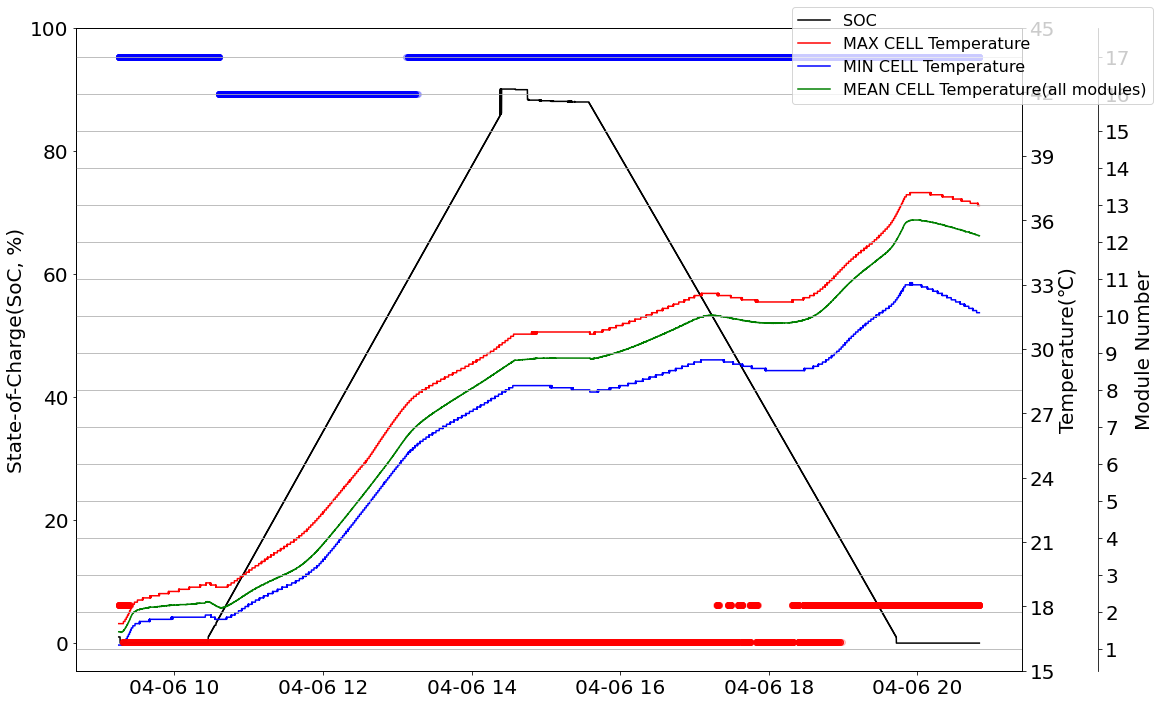

In [59]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from mpl_toolkits import axisartist
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = [16, 10]

def plot_mean_temperature_modules(modules):
    module_mean_temperature = pd.DataFrame()
    for i in range(1,modules.Module.max()+1):
        temp = modules.loc[modules['Module']==i]
        module_mean = temp[["MIN_CELL_TEMP","MAX_CELL_TEMP"]].mean(axis=1)
        module_mean_temperature = pd.concat([module_mean_temperature,module_mean], axis=1)
    ax2.plot(rack.index, module_mean_temperature.mean(axis=1)[:-1], color='green', label="MEAN CELL Temperature(all modules)")

## RACK의 온도 및 위치 시각화

fig, ax1 = plt.subplots(figsize=(16,10))
plt.rc('font', size=20) 

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax3.scatter(rack.index, (rack["MIN_CELL_TEMP_Pt"]-1)//2+1, color='blue', linewidths = 1, alpha=0.1)
ax3.scatter(rack.index, (rack["MAX_CELL_TEMP_Pt"]-1)//2+1+0.2, color='red', linewidths = 1, alpha=0.1)
ax2.plot(rack.index, rack["MAX_CELL_TEMP"], color='red' , label="MAX CELL Temperature")
ax2.plot(rack.index, rack["MIN_CELL_TEMP"], color='blue', label="MIN CELL Temperature")
ax1.plot(rack.index, rack["RACK_SOC"], color='black', label="SOC")

plot_mean_temperature_modules(modules)

ax1.set_ylabel("State-of-Charge(SoC, %)")
ax1.set_yticks([0,20,40,60,80,100])

ax2.set_ylabel("Temperature(℃)")
ax2.set_yticks([i for i in range(15,46,3)])

ax3.set_ylabel("Module Number")
ax3.set_yticks([i for i in range(1,18)])
ax3.grid()

fig.tight_layout()
fig.legend(fontsize=16)

plt.subplots_adjust(right=0.9)
ax3.spines["right"].set_position(("axes", 1.08))

plt.savefig("./2st_fig/rack/rack Temperature.jpg", dpi=256)

In [54]:
pd.set_option('display.max_rows', None)
print((rack["MAX_CELL_VOLT_Pt"]-1)//12+1)

 
2022-03-29 19:25:00    10
2022-03-29 19:25:01    10
2022-03-29 19:25:02    10
2022-03-29 19:25:03    10
2022-03-29 19:25:04    10
2022-03-29 19:25:05    10
2022-03-29 19:25:06    10
2022-03-29 19:25:07    10
2022-03-29 19:25:08    10
2022-03-29 19:25:09    10
2022-03-29 19:25:10    10
2022-03-29 19:25:11    10
2022-03-29 19:25:12    10
2022-03-29 19:25:13    10
2022-03-29 19:25:14    10
2022-03-29 19:25:15    10
2022-03-29 19:25:16    10
2022-03-29 19:25:17    10
2022-03-29 19:25:18    10
2022-03-29 19:25:19    10
2022-03-29 19:25:20    10
2022-03-29 19:25:21    10
2022-03-29 19:25:22    10
2022-03-29 19:25:23    10
2022-03-29 19:25:24    10
2022-03-29 19:25:25    10
2022-03-29 19:25:26    10
2022-03-29 19:25:27    10
2022-03-29 19:25:28    13
2022-03-29 19:25:29    15
2022-03-29 19:25:30    15
2022-03-29 19:25:31    13
2022-03-29 19:25:32    13
2022-03-29 19:25:33    13
2022-03-29 19:25:34    17
2022-03-29 19:25:35    17
2022-03-29 19:25:36    11
2022-03-29 19:25:37    11
2022-03-29

In [15]:
df.to_csv("./total_experiment_modules.csv")

In [70]:
df.Module.max()

14

In [48]:
df.columns

Index(['Module', 'Cell_Voltage1', 'Cell_Voltage2', 'Cell_Voltage3',
       'Cell_Voltage4', 'Cell_Voltage5', 'Cell_Voltage6', 'Cell_Voltage7',
       'Cell_Voltage8', 'Cell_Voltage9', 'Cell_Voltage10', 'Cell_Voltage11',
       'Cell_Voltage12', 'MIN_CELL_TEMP', 'MAX_CELL_TEMP', 'MIN_CELL_VOLT',
       'MIN_CELL_Volt_Pt', 'MAX_CELL_VOLT', 'MAX_CELL_Volt_Pt', 'Voltage'],
      dtype='object')

In [63]:
df.loc[df['Module']==1]

,Module,Cell_Voltage1,Cell_Voltage2,Cell_Voltage3,Cell_Voltage4,Cell_Voltage5,Cell_Voltage6,Cell_Voltage7,Cell_Voltage8,Cell_Voltage9,Cell_Voltage10,Cell_Voltage11,Cell_Voltage12,MIN_CELL_TEMP,MAX_CELL_TEMP,MIN_CELL_VOLT,MIN_CELL_Volt_Pt,MAX_CELL_VOLT,MAX_CELL_Volt_Pt,Voltage
2022-03-29 19:25:00,1,3.2139,3.2060,3.1974,3.1805,3.2041,3.2121,3.1895,3.2021,3.1952,3.2036,3.2169,3.2194,23.5,23.6,3.180,4,3.219,12,38.440
2022-03-29 19:25:01,1,3.2139,3.2060,3.1974,3.1805,3.2041,3.2121,3.1895,3.2021,3.1952,3.2036,3.2169,3.2194,23.5,23.6,3.180,4,3.219,12,38.440
2022-03-29 19:25:02,1,3.2135,3.2056,3.1970,3.1800,3.2036,3.2117,3.1891,3.2015,3.1949,3.2033,3.2163,3.2189,23.5,23.6,3.180,4,3.218,12,38.435
2022-03-29 19:25:03,1,3.2135,3.2056,3.1970,3.1800,3.2036,3.2117,3.1891,3.2015,3.1949,3.2033,3.2163,3.2189,23.5,23.6,3.180,4,3.218,12,38.435
2022-03-29 19:25:04,1,3.2139,3.2060,3.1972,3.1804,3.2040,3.2119,3.1895,3.2020,3.1951,3.2037,3.2169,3.2193,23.5,23.6,3.180,4,3.219,12,38.439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30 06:59:55,1,3.0166,3.0001,2.9842,2.9446,2.9969,3.0111,2.9628,2.9932,2.9821,2.9953,3.0199,3.0242,36.1,36.1,2.944,4,3.024,12,35.931
2022-03-30 06:59:56,1,3.0167,3.0000,2.9842,2.9446,2.9969,3.0112,2.9628,2.9931,2.9821,2.9952,3.0200,3.0242,36.1,36.1,2.944,4,3.024,12,35.931
2022-03-30 06:59:57,1,3.0167,3.0000,2.9842,2.9446,2.9969,3.0112,2.9628,2.9931,2.9821,2.9952,3.0200,3.0242,36.1,36.1,2.944,4,3.024,12,35.931
2022-03-30 06:59:58,1,3.0167,3.0000,2.9842,2.9446,2.9969,3.0112,2.9628,2.9931,2.9821,2.9952,3.0200,3.0242,36.1,36.1,2.944,4,3.024,12,35.931


In [84]:
import numpy as np

np.linspace(-8, 8, 1000)

array([-8.        , -7.98398398, -7.96796797, -7.95195195, -7.93593594,
       -7.91991992, -7.9039039 , -7.88788789, -7.87187187, -7.85585586,
       -7.83983984, -7.82382382, -7.80780781, -7.79179179, -7.77577578,
       -7.75975976, -7.74374374, -7.72772773, -7.71171171, -7.6956957 ,
       -7.67967968, -7.66366366, -7.64764765, -7.63163163, -7.61561562,
       -7.5995996 , -7.58358358, -7.56756757, -7.55155155, -7.53553554,
       -7.51951952, -7.5035035 , -7.48748749, -7.47147147, -7.45545546,
       -7.43943944, -7.42342342, -7.40740741, -7.39139139, -7.37537538,
       -7.35935936, -7.34334334, -7.32732733, -7.31131131, -7.2952953 ,
       -7.27927928, -7.26326326, -7.24724725, -7.23123123, -7.21521522,
       -7.1991992 , -7.18318318, -7.16716717, -7.15115115, -7.13513514,
       -7.11911912, -7.1031031 , -7.08708709, -7.07107107, -7.05505506,
       -7.03903904, -7.02302302, -7.00700701, -6.99099099, -6.97497497,
       -6.95895896, -6.94294294, -6.92692693, -6.91091091, -6.89